# Imbalance Handlings Techniques - Employee_Attrition

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [130]:
df=pd.read_csv('Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [132]:
df.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Age,1470.0,36.923810,9.135373,18.0,19.00,26.0,30.00,36.0,43.00,50.0,58.31,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,117.00,242.8,465.00,802.0,1157.00,1356.0,1485.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,1.00,1.0,2.00,7.0,14.00,23.0,29.00,29.0
Education,1470.0,2.912925,1.024165,1.0,1.00,1.0,2.00,3.0,4.00,4.0,5.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,19.69,198.9,491.25,1020.5,1555.75,1857.1,2046.62,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,1.00,1.0,2.00,3.0,4.00,4.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,30.00,38.0,48.00,66.0,83.75,94.0,100.00,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,1.00,2.0,2.00,3.0,3.00,3.0,4.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,1.0,1.00,2.0,3.00,4.0,5.00,5.0


## Labeling Attrition feature to 1/0

In [133]:
df['Attrition'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [134]:
df['Attrition']=np.where(df['Attrition']=="Yes",1,0)

In [135]:
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

## Defining target and independent variables

In [136]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

## Target variable value counts

	 Attrition value counts
0    1233
1     237
Name: Attrition, dtype: int64



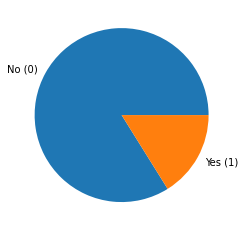

In [137]:
print('\t Attrition value counts')
print('==========================================')
print(y.value_counts())
print('\n==========================================')
plt.pie(x=y.value_counts(),labels=['No (0)','Yes (1)'])
plt.show()
print('==========================================')

## Defining minority and majority classes.

In [138]:
df_min=df[df['Attrition']==1]
df_maj=df[df['Attrition']==0]

## Handling imbalances in target variables

***
If there is imbalance in target variable as above, 
- There is high chance of getting baised towrds majority class which will tend to predict class wrongly.
- As there are very less observation with minority class, model might treat it as noise and might be ignored.
- Result of this will lead to less accuracy score.
- Inorder to balance observation, either majority class observation have to be downsampled or minority class needs to be upsampled.
***

### Upsampling Minority Class

In [139]:
from sklearn.utils import resample
df_min_us=resample(df_min,replace=True,n_samples=1233,random_state=13)
df_us=pd.concat([df_maj,df_min_us])
df_us['Attrition'].value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [140]:
df_us.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


### Downsampling Majority Class

In [141]:
from sklearn.utils import resample
df_maj_us=resample(df_maj,replace=True,n_samples=237,random_state=13)
df_ds=pd.concat([df_maj_us,df_min])
df_ds['Attrition'].value_counts()

1    237
0    237
Name: Attrition, dtype: int64

In [142]:
df_ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
398,37,0,Non-Travel,1063,Research & Development,25,5,Medical,1,529,2,Female,72,3,2,Research Scientist,3,Married,4449,23866,3,Y,Yes,15,3,1,80,2,15,2,3,13,11,10,7
208,40,0,Non-Travel,1151,Research & Development,9,5,Life Sciences,1,287,4,Male,63,2,2,Healthcare Representative,4,Married,4876,14242,9,Y,No,14,3,4,80,1,5,5,1,3,2,0,2
88,30,0,Travel_Rarely,288,Research & Development,2,3,Life Sciences,1,117,3,Male,99,2,2,Healthcare Representative,4,Married,4152,15830,1,Y,No,19,3,1,80,3,11,3,3,11,10,10,8
891,44,0,Travel_Rarely,1117,Research & Development,2,1,Life Sciences,1,1246,1,Female,72,4,1,Research Scientist,4,Married,2011,19982,1,Y,No,13,3,4,80,1,10,5,3,10,5,7,7
1043,53,0,Travel_Rarely,447,Research & Development,2,3,Medical,1,1472,4,Male,39,4,4,Research Director,2,Single,16598,19764,4,Y,No,12,3,2,80,0,35,2,2,9,8,8,8


### Synthetic Minority Oversample Technique

***
SMOTE is minority class oversampling technique where,
- Overfitting is controlled as it uses feature space to generate new instances.
- Interpolation between the instances is done using KNN methodology.
- As it uses distance method to increase the instances, variables should be interms of numerical values.
- So, we will convert categorical variables into numerical using one hot encoder/ label Encoder.
***

In [143]:
df=pd.read_csv('Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [144]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [145]:
df['Attrition']=np.where(df['Attrition']=="Yes",1,0)

#### Deviding dataframe into numerical and categorical.

In [146]:
df_num=df.select_dtypes('number')
df_cat=df.select_dtypes('object')

#### Converting categorical into numericals

In [147]:
df_cat=pd.get_dummies(df_cat,drop_first=True)

#### Concating back into single dataframe

In [148]:
df=pd.concat([df_num,df_cat],axis=1)

In [149]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


#### Defining target and independent variables

In [150]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

#### Data train and test split

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

#### Target variable value count

	 Attrition value counts
0    985
1    191
Name: Attrition, dtype: int64



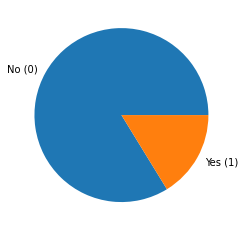

In [152]:
print('\t Attrition value counts')
print('==========================================')
print(y_train.value_counts())
print('\n==========================================')
plt.pie(x=y_train.value_counts(),labels=['No (0)','Yes (1)'])
plt.show()
print('==========================================')

#### SMOTE

In [153]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_smote,y_smote=sm.fit_resample(X_train,y_train)
y_smote.value_counts()

1    985
0    985
Name: Attrition, dtype: int64

Now, this balanced data could be used to train models to have better accuracy in prediction.